In [1]:
!git clone https://github.com/Godwin45/Track1

Cloning into 'Track1'...
remote: Enumerating objects: 28562, done.
remote: Total 28562 (delta 0), reused 0 (delta 0), pack-reused 28562
Receiving objects: 100% (28562/28562), 365.72 MiB | 33.30 MiB/s, done.
Checking out files: 100% (28567/28567), done.


In [44]:
!ls Track1

driving_log.csv  IMG


In [45]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import ntpath
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

In [58]:
datadir = 'Track1'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'),names = columns)
#pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\User\Desktop\car picture\IMG\center_2021_01_31_12_12_01_852.jpg,C:\Users\User\Desktop\car picture\IMG\left_2021_01_31_12_12_01_852.jpg,C:\Users\User\Desktop\car picture\IMG\right_2021_01_31_12_12_01_852.jpg,0.0,0.000000,0,0.000079
1,C:\Users\User\Desktop\car picture\IMG\center_2021_01_31_12_12_01_955.jpg,C:\Users\User\Desktop\car picture\IMG\left_2021_01_31_12_12_01_955.jpg,C:\Users\User\Desktop\car picture\IMG\right_2021_01_31_12_12_01_955.jpg,0.0,0.000000,0,0.000080
2,C:\Users\User\Desktop\car picture\IMG\center_2021_01_31_12_12_02_058.jpg,C:\Users\User\Desktop\car picture\IMG\left_2021_01_31_12_12_02_058.jpg,C:\Users\User\Desktop\car picture\IMG\right_2021_01_31_12_12_02_058.jpg,0.0,0.000000,0,0.000080
3,C:\Users\User\Desktop\car picture\IMG\center_2021_01_31_12_12_02_163.jpg,C:\Users\User\Desktop\car picture\IMG\left_2021_01_31_12_12_02_163.jpg,C:\Users\User\Desktop\car picture\IMG\right_2021_01_31_12_12_02_163.jpg,0.0,0.000000,0,0.000079
4,C:\Users\User\Desktop\car picture\IMG\center_2021_01_31_12_12_02_266.jpg,C:\Users\User\Desktop\car picture\IMG\left_2021_01_31_12_12_02_266.jpg,C:\Users\User\Desktop\car picture\IMG\right_2021_01_31_12_12_02_266.jpg,0.0,0.054574,0,0.015985


In [59]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_01_31_12_12_01_852.jpg,left_2021_01_31_12_12_01_852.jpg,right_2021_01_31_12_12_01_852.jpg,0.0,0.000000,0,0.000079
1,center_2021_01_31_12_12_01_955.jpg,left_2021_01_31_12_12_01_955.jpg,right_2021_01_31_12_12_01_955.jpg,0.0,0.000000,0,0.000080
2,center_2021_01_31_12_12_02_058.jpg,left_2021_01_31_12_12_02_058.jpg,right_2021_01_31_12_12_02_058.jpg,0.0,0.000000,0,0.000080
3,center_2021_01_31_12_12_02_163.jpg,left_2021_01_31_12_12_02_163.jpg,right_2021_01_31_12_12_02_163.jpg,0.0,0.000000,0,0.000079
4,center_2021_01_31_12_12_02_266.jpg,left_2021_01_31_12_12_02_266.jpg,right_2021_01_31_12_12_02_266.jpg,0.0,0.054574,0,0.015985


<BarContainer object of 25 artists>

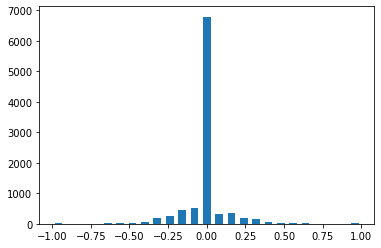

In [60]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
#print(bins)
plt.bar(center, hist, width = 0.05)

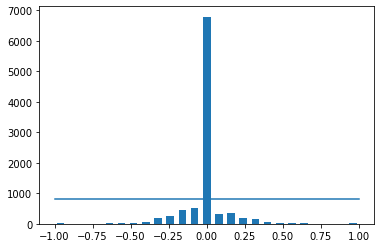

In [61]:
num_bins = 25
samples_per_bin = 800
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 9522
removed: 5989
remaining: 3533


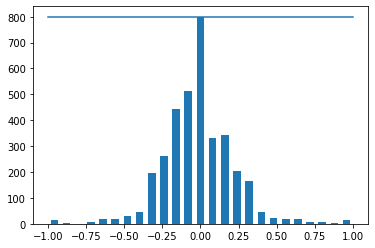

In [62]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [78]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steerings)
  return image_paths, steerings

center      center_2021_01_31_12_12_02_163.jpg
left          left_2021_01_31_12_12_02_163.jpg
right        right_2021_01_31_12_12_02_163.jpg
steering                                     0
throttle                                     0
reverse                                      0
speed                              7.94106e-05
Name: 3, dtype: object


In [81]:
x_train, x_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2)
print('Training Samples: {}\nValid Samples: {}'.format(len(x_train), len(x_valid)))

Training Samples: 8479
Valid Samples: 2120


Text(0.5, 1.0, 'Validation set')

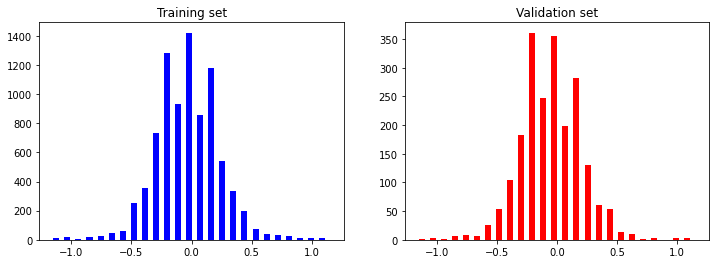

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [111]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:130, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255

  return img

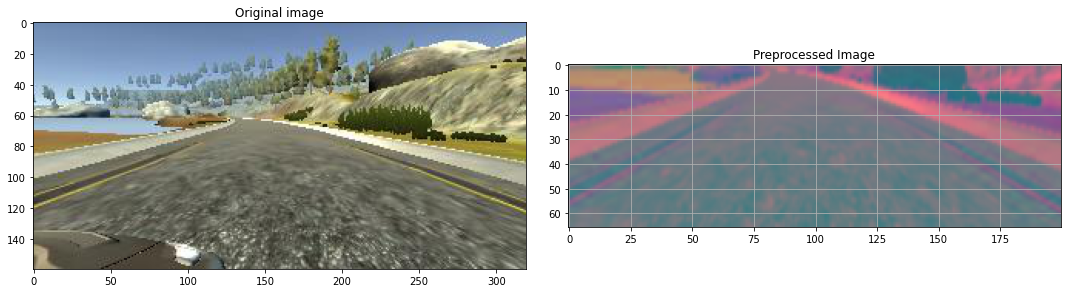

In [112]:
image = image_paths[200]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
plt.grid('on')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')
plt.grid('on')

In [113]:
x_train = np.array(list(map(img_preprocess, x_train)))
x_valid = np.array(list(map(img_preprocess, x_valid)))

(8479, 66, 200, 3)


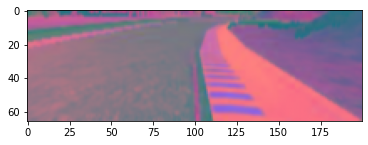

In [123]:
plt.imshow(x_train[random.randint(0, len(x_train) - 1)])
print(x_train.shape)